# Kickstarter Project Success

**Task:**

In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


**Kickstarter Rules:**

https://www.kickstarter.com/rules?ref=global-footer

**Motivation:**

As a pledger you don't have a guarantee for getting a refund in case the fundraising goal is reached and nevertheless a project is not successful or a project is a scam.

https://www.kickstarter.com/terms-of-use#section4?ref=faq-basics_creatoroblig

https://help.kickstarter.com/hc/en-us/articles/115005048173-Can-Kickstarter-refund-the-money-if-a-project-is-unable-to-fulfill-

**Business cases:**

1. You want to croundfund your project and you are not sure if a croudfunding campaign on Kickstarter will be successful. We will find out how likely the success for your project is and tell you the most important influencing factors.


2. You want to pledge for a Kickstarter project but you are unsure if a specific project will be a success. We will find out how likely the success for the specific project is and tell you which factors influenced our estimation.


**Contents:**
1. Importing Python libraries and dataset
2. Understanding the data
3. Preparing the data for plotting
4. Plotting
5. Data Preparation for ML
6. Machine Learning
7. Summary
8. Future Work

## 1. Importing Python libraries and dataset

In [1]:
#reset - fs # Resets the namespace by removing all names defined by the user

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import datetime
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
# Importing the dataset
# Original Source: https://webrobots.io/kickstarter-datasets/
df_orig = pd.concat([pd.read_csv(f) for f in glob.glob(r'C:\Users\Numa Langsam\Downloads\Kickstarter_CSVs/Kickstarter*.csv')], ignore_index = True)

In [4]:
# creating a copy of the dataframe for easier restarts of it (Importing the data takes much longer)
df = df_orig.copy()

In [5]:
# setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

## 2. Understanding the data

**Feature description (RAW data):**

* backers_count - Number of people who contributed funds to the project
* blurb - Short description of the project
* category - Contains the category and sub-category of the project
* converted_pledged_amount - Amount of money pledged, converted to the currency in the 'current_currency' column
* country - Origin country of the project creator
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format)
* creator - Name of the project creator and other information about them, e.g. Kickstarter id number
* currency - Original currency the project goal was denominated in
* currency_symbol - Symbol of the original currency the project goal was denominated in
* currency_trailing_code - Code of the original currency the project goal was denominated in
* current_currency - Currency the project goal was converted to
* deadline - Date and time of when the project will close for donations (in Unix format)
* disable_communication - Whether or not a project owner disabled communication with their backers
* friends - Unclear (null or empty)
* fx_rate - Foreign exchange rate between the original currency and the current_currency
* goal - Funding goal
* id - ID number of the project
* is_backing - Unclear (null or false)
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users
* is_starred - Whether or not a project has been starred (i.e. liked and saved) by users
* launched_at - Date and time of when the project was launched for funding (in Unix format)
* location - Contains the town or city of the project creator
* name - Name of the project
* permissions - Unclear (null or empty)
* photo - Contains a link and information to the project's photo/s
* pledged - Amount pledged in the current_currency
* profile - Details about the project's profile, including id number and various visual settings
* slug - Name of the project with hyphens instead of spaces
* source_url - URL for the project's category
* spotlight - After a project has been successful, it is spotlighted on the Kickstarter website
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live
* state - Whether a project was successful, failed, canceled, suspending or still live
* state_changed_at - Date and time of when a project's status was changed (same as the deadline for successful and failed projects) (in Unix format)
* static_usd_rate - Conversion rate between the original currency and USD
* urls - URL to the project's page
* usd_pledged - Amount pledged in USD
* usd_type - Domestic or international


In [6]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,USD,1391899046,False,NaN,1.0,200.0,287514992,NaN,False,NaN,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,NaN,"{""key"":""assets/011/625/534/5bea1760d7f20943c4c...",802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,USD,1551801611,False,NaN,1.0,400.0,385129759,NaN,False,NaN,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,NaN,"{""key"":""assets/024/033/030/dea4e3901d10195b035...",2259.0,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2259.0,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,USD,1480607930,False,NaN,1.0,27224.0,681033598,NaN,False,NaN,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,NaN,"{""key"":""assets/014/262/672/97944960ba30239051d...",29638.0,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",29638.0,international


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

In [8]:
# No. of values in feature 'is_starred'
df.is_starred.value_counts()

False    298
True       2
Name: is_starred, dtype: int64

In [9]:
# No. of values in feature 'state'
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

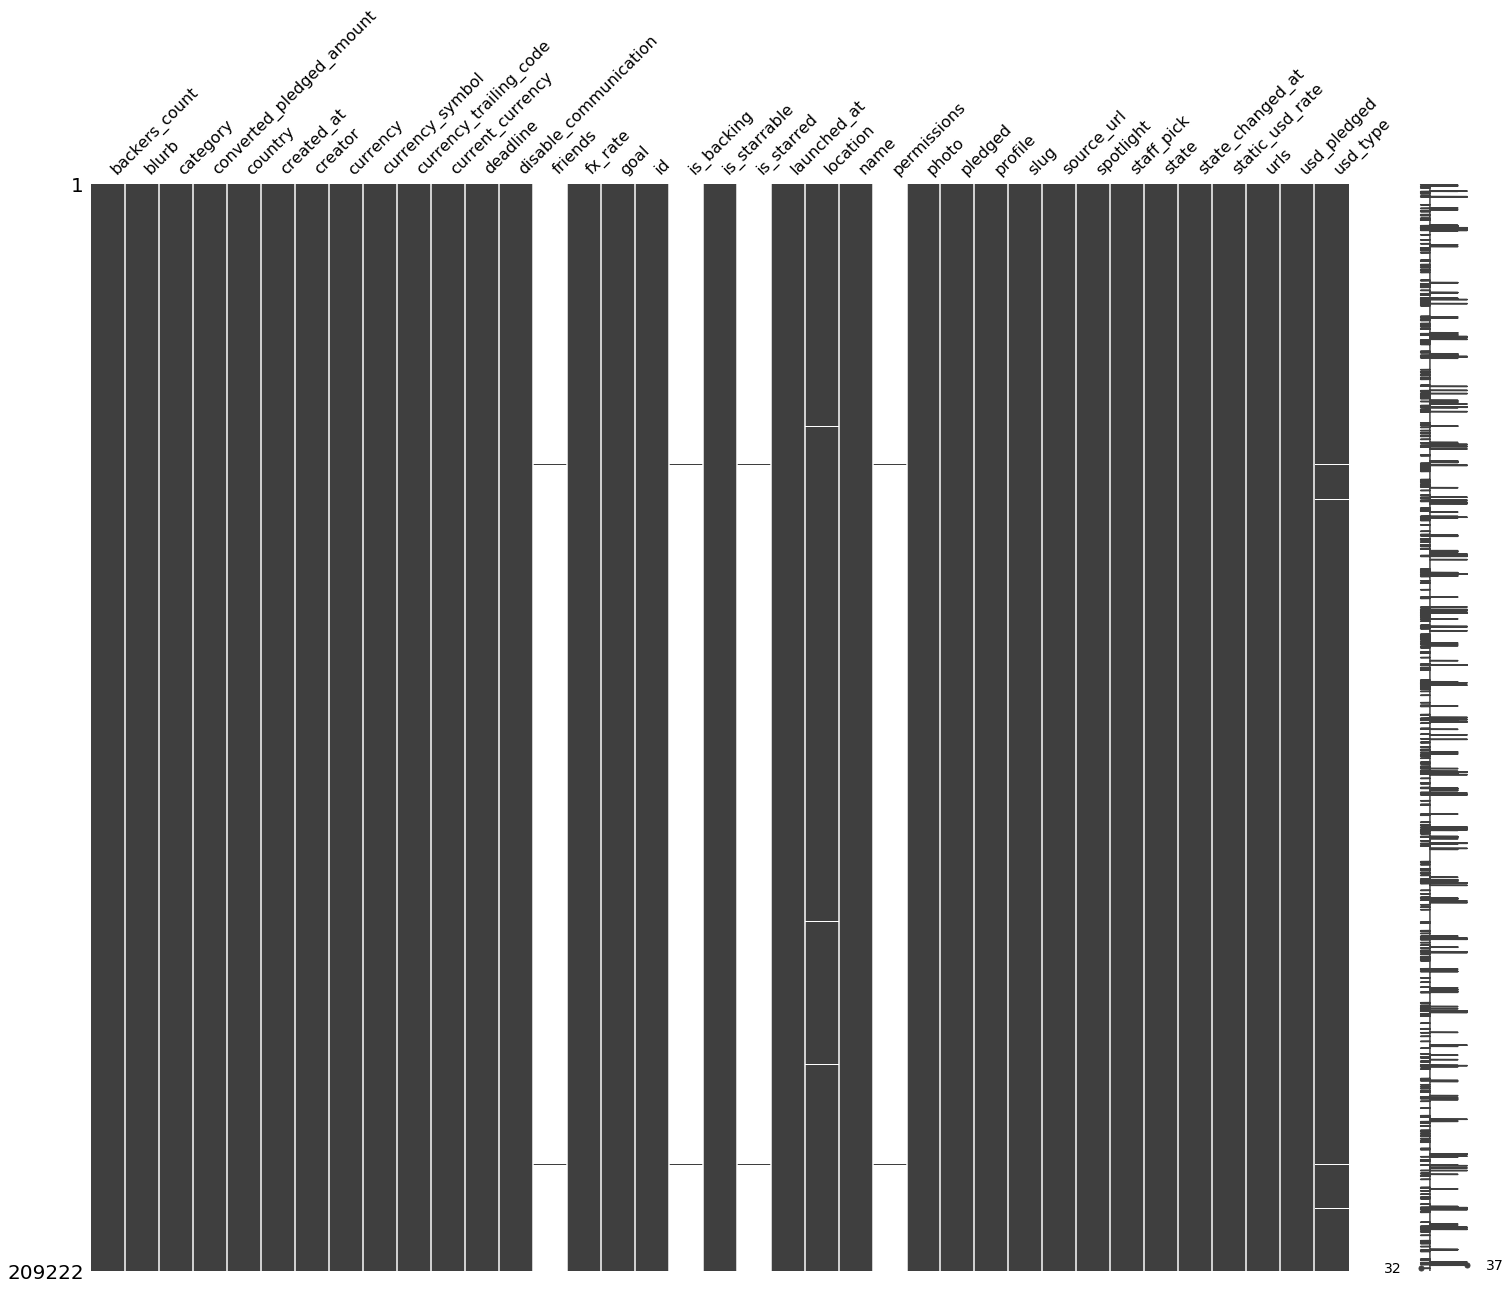

In [10]:
# Getting an overview of missing values in the dataset
# missingno is not part of the Anaconda package. Installation via 'pip install missingno'.
msno.matrix(df, figsize=(25,20))

### A first brief analysis leads to the following insights:

**Features to be removed:**

* friends - Basically does not contain any data
* is_backing - Basically does not contain any data
* is_starred - Basically does not contain any data
* permissions - Basically does not contain any data

**Features identified as unimportant regarding success / non-success:**
* converted_pledged_amount
* currency
* currency_symbol
* currency_trailing_code
* current_currency
* fx_rate
* photo
* pledged
* slug
* source_url
* spotlight
* state_changed_at
* urls
* usd_type

## 3. Preparing the data for plotting

In the following, an exploratory data analysis is performed, leading to a revised dataset.

In [11]:
# Reducing the 'state'-feature to a binary successful/failed variable
df = df.drop(df[df['state'] == 'canceled'].index, axis=0)
df = df.drop(df[df['state'] == 'live'].index, axis=0)
df = df.drop(df[df['state'] == 'suspended'].index, axis=0)

In [14]:
# Resetting the index is necessary after rows have been deleted. This step is perfomed a couple of times during the EDA.
df.reset_index()
df.head(1)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,USD,1391899046,False,NaN,1.0,200.0,287514992,NaN,False,NaN,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,NaN,"{""key"":""assets/011/625/534/5bea1760d7f20943c4c...",802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international


In [15]:
# Converting the 'goal' feature to 'usd_goal'
# Reducing all currency values to two decimal digits
df['usd_goal'] = round((df['goal'] * df['static_usd_rate']), 2)
df['usd_pledged'] = round(df['usd_pledged'], 2)

In [16]:
# Building two new columns for sub- and categories by reading them from the original category column
df['sub_category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split("/")[1].split('","position"')[0], axis=1)
df['category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split('",')[0].split("/")[0], axis=1)

In [17]:
# Checking the number of samples for the different categories
df.category.value_counts()

music           25920
film & video    25653
technology      19476
art             19217
publishing      18690
food            14948
games           12452
fashion         10764
comics           8190
design           7680
photography      7390
crafts           6549
theater          6478
journalism       5338
dance            3919
Name: category, dtype: int64

In [18]:
# Creating new columns for the id of users (creator of a project) and the number of projects they already did
df['creator_id'] = df.apply(lambda x: x['creator'].split('"id":')[1].split(',"name"')[0], axis=1)
df['number_of_projects'] = df.groupby('creator_id')['creator_id'].transform('count')

In [19]:
# Data Cleaning
drop_list = ["friends", "is_backing", "is_starred", "permissions", "converted_pledged_amount", "goal", "creator",
             "creator_id", "currency", "currency_symbol", "currency_trailing_code", "current_currency", "fx_rate", 
             "photo", "pledged", "slug", "source_url", "spotlight", "state_changed_at", "urls", "usd_type"]
df.drop(columns = drop_list, inplace=True)

In [20]:
# Converting dates from unix to datetime
df_date_columns = ['created_at', 'deadline', 'launched_at']
for i in df_date_columns:
    df[i] = pd.to_datetime(df[i], origin='unix', unit='s')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 20 columns):
backers_count            192664 non-null int64
blurb                    192662 non-null object
category                 192664 non-null object
country                  192664 non-null object
created_at               192664 non-null datetime64[ns]
deadline                 192664 non-null datetime64[ns]
disable_communication    192664 non-null bool
id                       192664 non-null int64
is_starrable             192664 non-null bool
launched_at              192664 non-null datetime64[ns]
location                 192449 non-null object
name                     192664 non-null object
profile                  192664 non-null object
staff_pick               192664 non-null bool
state                    192664 non-null object
static_usd_rate          192664 non-null float64
usd_pledged              192664 non-null float64
usd_goal                 192664 non-null float64
sub_ca

**Feature desciption after dataset revision:**

* backers_count - Number of people who contributed funds to the project --> OK
* blurb - Short description of the project --> IGNORED FOR ML
* category - Contains the category and sub-category of the project --> CATEGORIAL
* country - Origin country of the project creator --> CATEGORIAL
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format) --> CATEGORIAL MONTHS
* creator - Name of the project creator and other information about them, e.g. Kickstarter id number --> IGNORED FOR ML
* deadline - Date and time of when the project will close for donations (in Unix format) --> 
* disable_communication - Whether or not a project owner disabled communication with their backers --> CATEGORIAL
* id - ID number of the project --> IGNORED
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users --> CATEGORIAL
* launched_at - Date and time of when the project was launched for funding (in Unix format) --> DEADLINE-LAUNCHED = RUNTIME
* location - Contains the town or city of the project creator --> IGNORED FOR ML
* name - Name of the project --> IGNORED
* profile - Details about the project's profile, including id number and various visual settings --> IGNORED
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live --> CATEGORIAL
* state - Whether a project was successful, failed, canceled, suspending or still live --> y
* static_usd_rate - Conversion rate between the original currency and USD --> OK
* usd_pledged - Amount pledged in USD --> OK
* usd_goal - Funding goal in USD --> OK
* sub_category - CATEGORIAL
* number_of_projects - number of projects per Kickstarter account --> OK

In [22]:
# Detailed check for NaN values
df.isna().sum()

backers_count              0
blurb                      2
category                   0
country                    0
created_at                 0
deadline                   0
disable_communication      0
id                         0
is_starrable               0
launched_at                0
location                 215
name                       0
profile                    0
staff_pick                 0
state                      0
static_usd_rate            0
usd_pledged                0
usd_goal                   0
sub_category               0
number_of_projects         0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.reset_index()
df.head(1)

,backers_count,blurb,category,country,created_at,deadline,disable_communication,id,is_starrable,launched_at,location,name,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,sub_category,number_of_projects
0,21,2006 was almost 7 years ago.... Can you believ...,music,US,2013-12-21 21:01:30,2014-02-08 22:37:26,False,287514992,False,2013-12-25 22:37:26,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,"{""id"":822687,""project_id"":822687,""state"":""inac...",False,successful,1.0,802.0,200.0,rock,1


In [25]:
# Check if all NaN values have been successfully dropped
df.isna().sum()

backers_count            0
blurb                    0
category                 0
country                  0
created_at               0
deadline                 0
disable_communication    0
id                       0
is_starrable             0
launched_at              0
location                 0
name                     0
profile                  0
staff_pick               0
state                    0
static_usd_rate          0
usd_pledged              0
usd_goal                 0
sub_category             0
number_of_projects       0
dtype: int64

In [26]:
# Number of dublicate IDs
df.duplicated(subset='id').sum()

23683

In [27]:
# Building a list of duplicate IDs to see where the other features are identical
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
dup_ids = duplicated.id.unique()
duplist = []
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values    
    duplist.append(df.loc[index1[0]] == df.loc[index2[0]])

In [28]:
sum(duplist)

backers_count            23683
blurb                    23683
category                 23683
country                  23683
created_at               23683
deadline                 23683
disable_communication    23683
id                       23683
is_starrable             23683
launched_at              23683
location                 23683
name                     23683
profile                  23683
staff_pick               23683
state                    23683
static_usd_rate          23672
usd_pledged              23672
usd_goal                 23672
sub_category             23683
number_of_projects       23683
dtype: int32

**Almost all duplicates can be dropped as for 23672 out of 23683 samples with identical IDs, all features are identical.**

In [29]:
# Deleting the duplicates
df.drop_duplicates(inplace=True)

In [30]:
# Number of dublicate IDs
df.duplicated(subset='id').sum()

11

In [31]:
# Due to the very low number of dublicates left in the dataset, they are dropped without further analysis

In [32]:
df.drop_duplicates(subset="id", inplace=True)

In [33]:
df.duplicated(subset='id').sum()

0

In [34]:
# Data Cleaning
drop_list = ["id"]
df.drop(columns=drop_list, inplace=True)

In [35]:
df.reset_index()
df.head(1)

,backers_count,blurb,category,country,created_at,deadline,disable_communication,is_starrable,launched_at,location,name,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,sub_category,number_of_projects
0,21,2006 was almost 7 years ago.... Can you believ...,music,US,2013-12-21 21:01:30,2014-02-08 22:37:26,False,False,2013-12-25 22:37:26,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,"{""id"":822687,""project_id"":822687,""state"":""inac...",False,successful,1.0,802.0,200.0,rock,1


In [36]:
# Column for the duration of a project based on deadline and launch date
df["duration"] = df.deadline - df.launched_at
df['duration'] = df.apply(lambda x: x['duration'].days, axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 0 to 209220
Data columns (total 20 columns):
backers_count            168764 non-null int64
blurb                    168764 non-null object
category                 168764 non-null object
country                  168764 non-null object
created_at               168764 non-null datetime64[ns]
deadline                 168764 non-null datetime64[ns]
disable_communication    168764 non-null bool
is_starrable             168764 non-null bool
launched_at              168764 non-null datetime64[ns]
location                 168764 non-null object
name                     168764 non-null object
profile                  168764 non-null object
staff_pick               168764 non-null bool
state                    168764 non-null object
static_usd_rate          168764 non-null float64
usd_pledged              168764 non-null float64
usd_goal                 168764 non-null float64
sub_category             168764 non-null object
numbe

## 4. Plotting

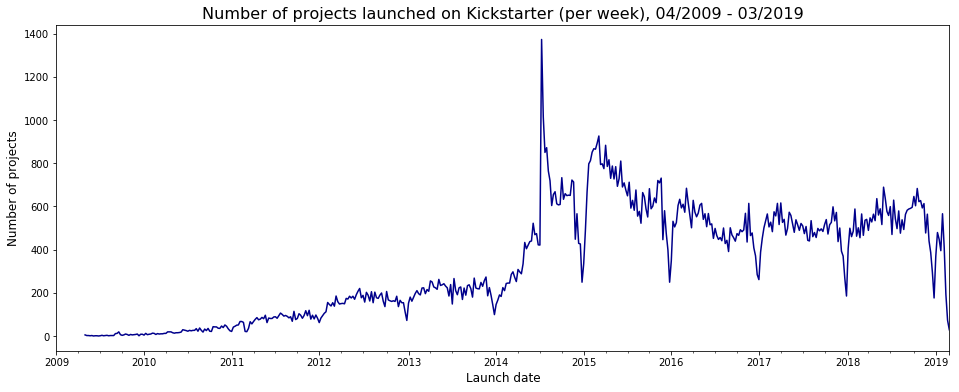

In [38]:
# Plotting the number of projects launched per week
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-02-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

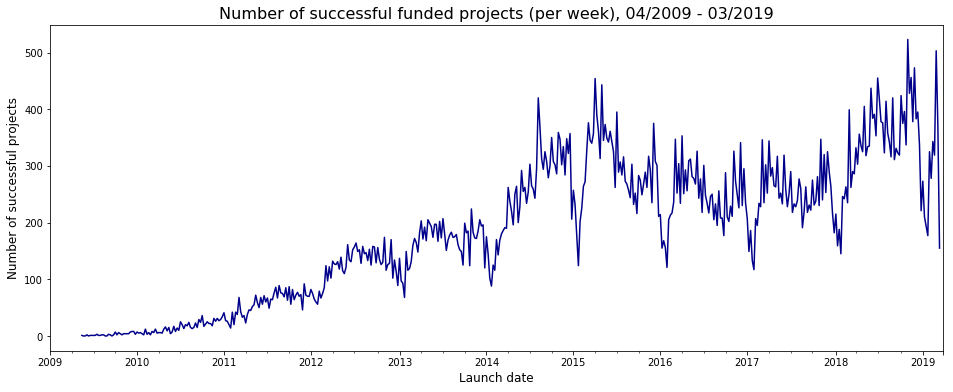

In [39]:
# Plotting the number of successful projects per week
plt.figure(figsize=(16,6))
df[df['state'] == 'successful'].set_index('deadline').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-03-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of successful projects', fontsize=12)
plt.title('Number of successful funded projects (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

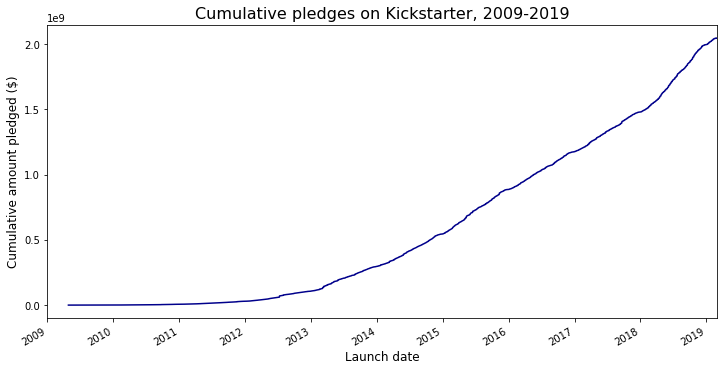

In [40]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(12,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount pledged ($)', fontsize=12)
plt.title('Cumulative pledges on Kickstarter, 2009-2019', fontsize=16)
plt.show()

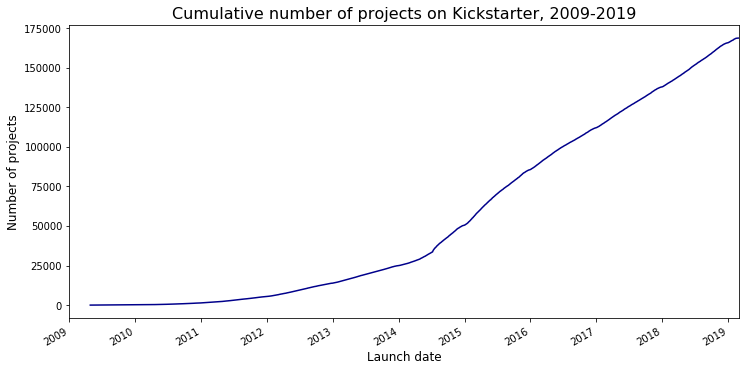

In [41]:
# Plotting the cumulative number of projects on Kickstarter
df2 = df.copy()
df2['ones'] = 1
plt.figure(figsize=(12,6))
df2.set_index('launched_at').sort_index().ones.cumsum().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Cumulative number of projects on Kickstarter, 2009-2019', fontsize=16)
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

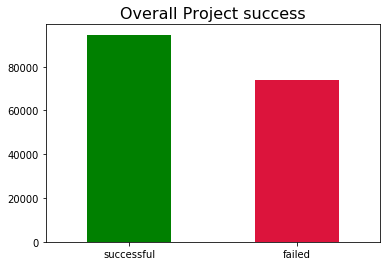

In [42]:
# Plotting the overall success and failure
plt.title('Overall Project success', fontsize=16)
df.state.value_counts().plot(kind='bar', color=['green', 'crimson']);
plt.xticks(rotation='horizontal')

In [154]:
zaehler = df['state'].value_counts(normalize=True)
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
zaehler

successful    0.560629
failed        0.439371
Name: state, dtype: float64

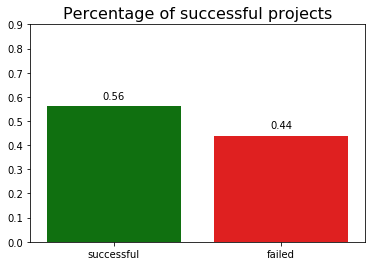

In [190]:
states = df['state'].value_counts(normalize=True)
plt.figure(figsize = (6,4))
plt.ylim(0.0, 0.9)
plt.title('Percentage of successful projects', fontsize=16)
splot=sns.barplot(x=states.index, y=states.values, palette=['green', 'red'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

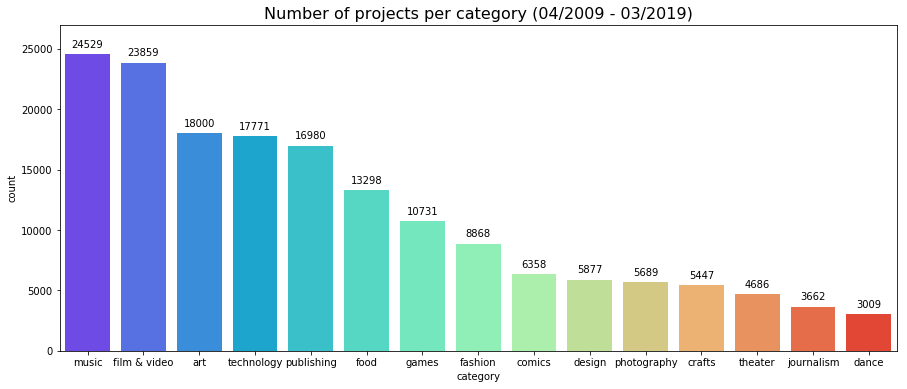

In [109]:
# Plotting the number of projects per category
plt.figure(figsize = (15,6))
plt.title('Number of projects per category (04/2009 - 03/2019)', fontsize=16)
plt.ylim(0.0, 27000)
splot = sns.countplot(x=df['category'], order = df['category'].value_counts().index, palette='rainbow')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

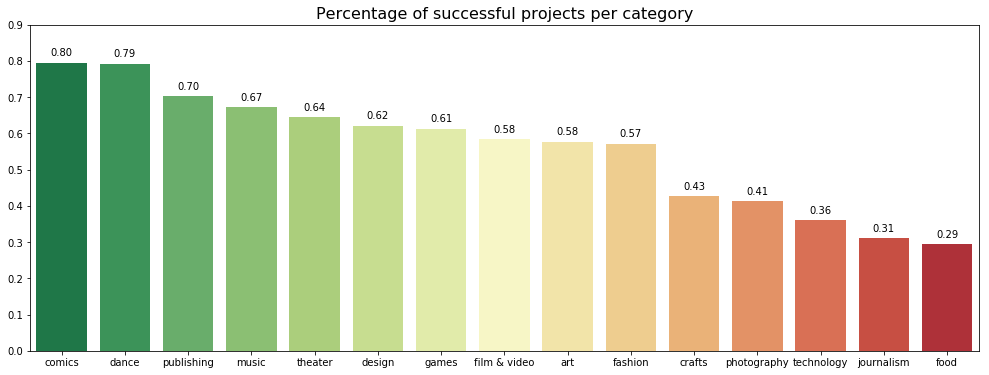

In [139]:
# Plotting the percentage of successful projects per category
plt.figure(figsize = (17,6))
zaehler = df[df['state'] == 'successful']['category'].value_counts()
nenner = df[df['state'] == 'failed']['category'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn_r')
plt.ylim(0.0, 0.9)
plt.title('Percentage of successful projects per category', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

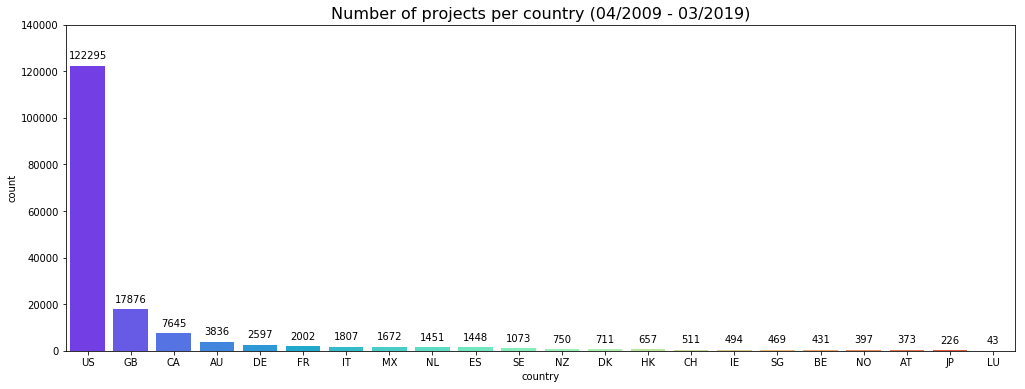

In [111]:
# Plotting the number of projects per country
plt.figure(figsize = (17,6))
plt.ylim(0, 140000)
plt.title('Number of projects per country (04/2009 - 03/2019)', fontsize=16)
splot = sns.countplot(x=df['country'], order = df['country'].value_counts().index, palette='rainbow')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

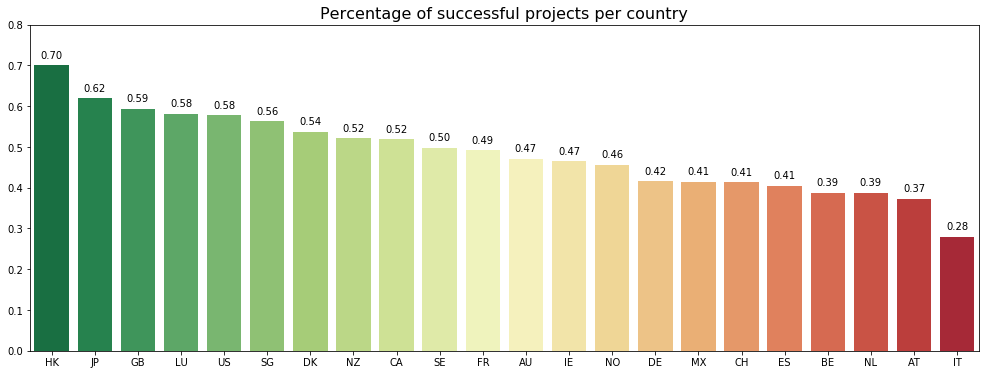

In [112]:
# Plotting the percentage of successful projects per country
plt.figure(figsize = (17,6))
zaehler = df[df['state'] == 'successful']['country'].value_counts()
nenner = df[df['state'] == 'failed']['country'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn_r')
plt.ylim(0.0, 0.8)
plt.title('Percentage of successful projects per country', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

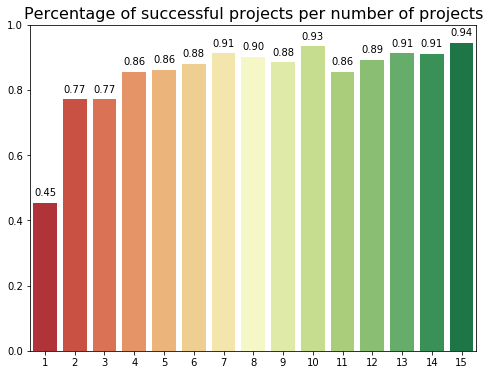

In [113]:
# Plotting the percentage of successful projects per number of projects done by creator
plt.figure(figsize = (8,6))
df_lim = df[df['number_of_projects'] <= 15]
zaehler = df_lim[df_lim['state'] == 'successful']['number_of_projects'].value_counts()
nenner = df_lim[df_lim['state'] == 'failed']['number_of_projects'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn')
plt.ylim(0.0, 1.0)
plt.title('Percentage of successful projects per number of projects', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

(14, 61)

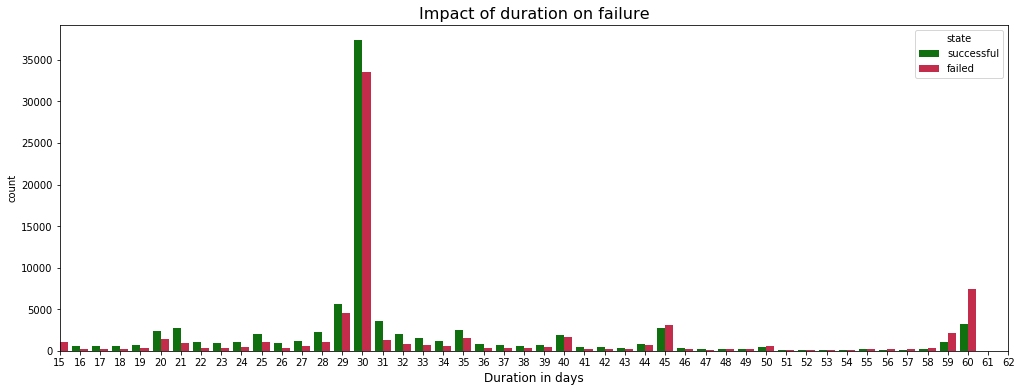

In [114]:
# Plotting the duration to success/failed ratio
plt.figure(figsize = (17,6))
plt.title('Impact of duration on failure', fontsize=16)
sns.countplot(x=df['duration'], hue=df['state'], palette = ['green', 'crimson'])
plt.xlabel('Duration in days', fontsize=12)
plt.xlim(14, 61)

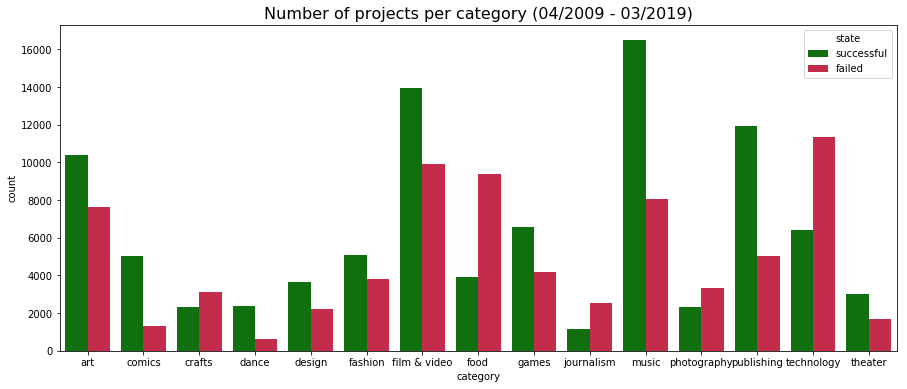

In [115]:
# Plotting the number of projects per category with success / failed
zaehler = df[df['state'] == 'successful']['category'].value_counts()
nenner = df[df['state'] == 'failed']['category'].value_counts()
erg = zaehler/nenner
plt.figure(figsize = (15,6))
plt.title('Number of projects per category (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df['category'], hue=df['state'], palette = ['green', 'crimson'], order=erg.index)

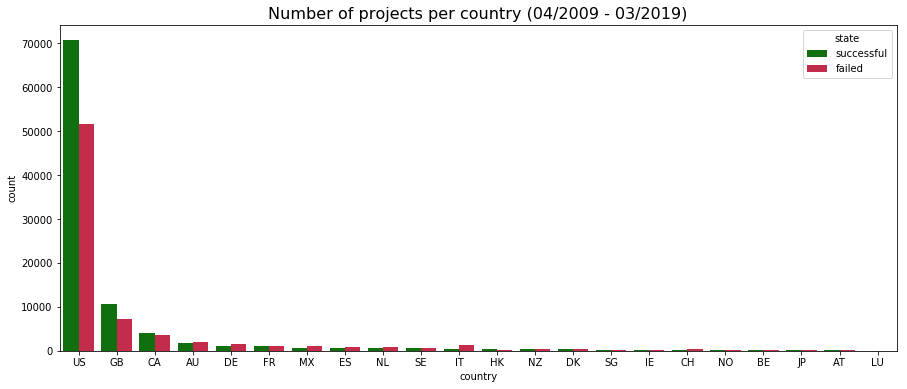

In [116]:
# Plotting the number of projects per country with success/failed
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df['country'], hue=df['state'], palette = ['green', 'crimson'], order = df[df['state'] == 'successful']['country'].value_counts().index)

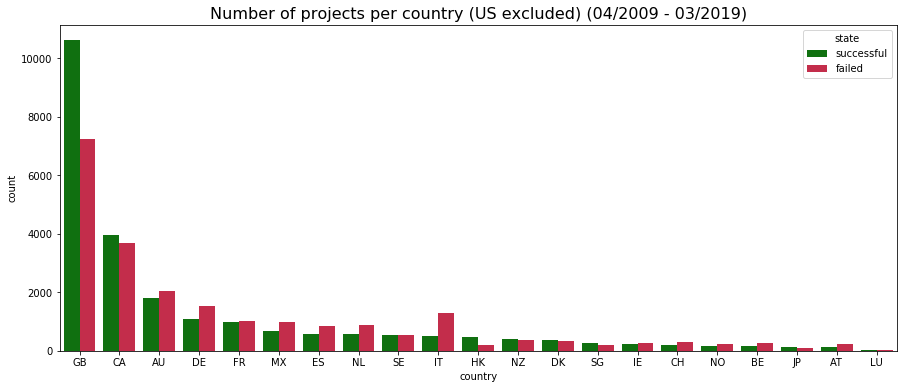

In [117]:
# Plotting the number of projects per county without Us with success/failed
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (US excluded) (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df.drop(df[df['country'] == 'US'].index, axis=0)['country'], hue=df['state'], palette = ['green', 'crimson'], order = df.drop(df[df['country'] == 'US'].index, axis=0)[df.drop(df[df['country'] == 'US'].index, axis=0)['state'] == 'successful']['country'].value_counts().index)

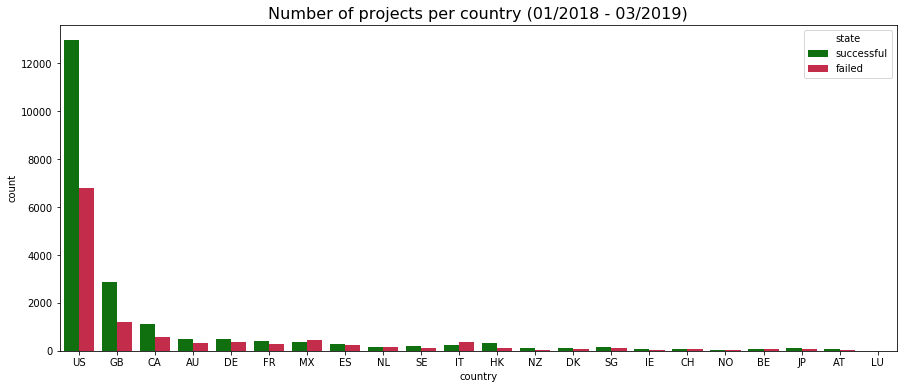

In [118]:
# Plotting the number of projects per country from 2018 to 2019
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (01/2018 - 03/2019)', fontsize=16)
sns.countplot(x=df[df['deadline'] > datetime.datetime(2018,1,1)]['country'], hue=df['state'], palette = ['green', 'crimson'], order = df[df['state'] == 'successful']['country'].value_counts().index)

In [191]:
df['launched_at'].max()

Timestamp('2019-03-06 05:07:40')

In [192]:
year_count = df.set_index("launched_at").category.resample("M").count()
failed_count = df[df["state"] == "failed"].set_index("launched_at").category.resample("M").count()
count = failed_count / year_count *100

In [193]:
failed_count = df[df["state"] == "successful"].set_index("duration").count()
failed_count

backers_count            94614
blurb                    94614
category                 94614
country                  94614
created_at               94614
deadline                 94614
disable_communication    94614
is_starrable             94614
launched_at              94614
location                 94614
name                     94614
profile                  94614
staff_pick               94614
state                    94614
static_usd_rate          94614
usd_pledged              94614
usd_goal                 94614
sub_category             94614
number_of_projects       94614
dtype: int64

In [43]:
# Plotting the number of projects launched per week
#sns.lineplot(x="duration", y="signal", hue="event",data=df)

(0, 70000)

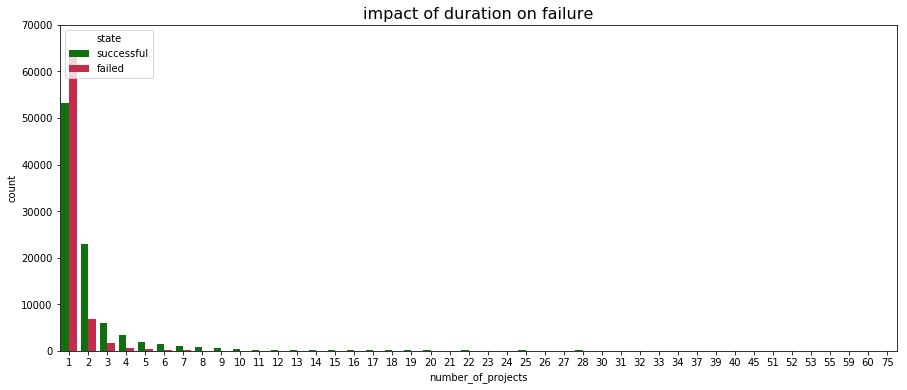

In [131]:
# Plotting the project duration to success/failed
plt.figure(figsize = (15,6))
plt.title('impact of duration on failure', fontsize=16)
sns.countplot(x=df['number_of_projects'], hue=df['state'], palette = ['green', 'crimson'])
plt.ylim(0, 70000)

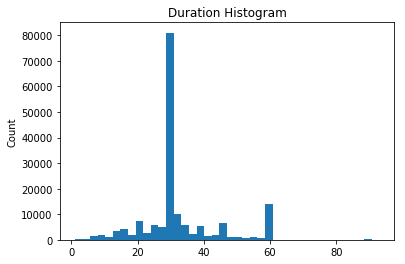

In [51]:
# Plotting the duration histogram
plt.hist(df['duration'], bins=40)
plt.gca().set(title='Duration Histogram', ylabel='Count');
plt.show()

(0, 7500)

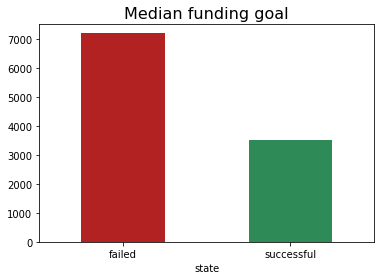

In [48]:
# Plotting the median of funding goal per success / failed
splot = df.groupby('state').usd_goal.median().plot(kind='bar', color=['firebrick', 'seagreen'], rot=0)
plt.title('Median funding goal', fontsize=16)
plt.ylim(0, 7500)
#for p in splot.patches:
 #   splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## 5. Data Preparation for ML

**Handling decisions of the features for machine learing models:**

* backers_count - Number of people who contributed funds to the project --> OK
* blurb - Short description of the project --> IGNORED FOR ML
* category - Contains the category and sub-category of the project --> CATEGORIAL
* country - Origin country of the project creator --> CATEGORIAL
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format) --> CATEGORIAL MONTHS
* deadline - Date and time of when the project will close for donations (in Unix format) --> 
* disable_communication - Whether or not a project owner disabled communication with their backers --> CATEGORIAL
* id - ID number of the project --> IGNORED
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users --> CATEGORIAL
* launched_at - Date and time of when the project was launched for funding (in Unix format) --> DEADLINE-LAUNCHED = RUNTIME
* location - Contains the town or city of the project creator --> IGNORED FOR ML
* name - Name of the project --> IGNORED
* profile - Details about the project's profile, including id number and various visual settings --> IGNORED
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live --> CATEGORIAL
* state - Whether a project was successful, failed, canceled, suspending or still live --> y
* static_usd_rate - Conversion rate between the original currency and USD --> OK
* usd_pledged - Amount pledged in USD --> OK
* usd_goal - Funding goal in USD --> OK
* sub_category - CATEGORIAL
* number_of_projects - number of projects per Kickstarter account --> OK

In [28]:
# Creating columns for year and month when the project was created (care then using this code when using data from year 2100+)
df['year_created'] = df.apply(lambda x: x['created_at'].year, axis=1)-2000
df['month_created'] = df.apply(lambda x: x['created_at'].month, axis=1)

In [29]:
# New dataframes for machine learning purpose
df_t = df.copy()
df_t = df_t.drop(columns = ["disable_communication","backers_count", 'blurb', 'deadline',
                            'launched_at', 'location', 'name', 'profile', 'created_at', 'usd_pledged'])

df_t["state"] = df_t["state"].replace({"successful": 1, "failed": 0})
df_t[["is_starrable", "staff_pick"]] = df_t[["is_starrable", "staff_pick"]].astype(int)

df_sample = df_t.sample(n=20000, random_state=23) #also building a df consisting 
                                                  #of a small sample of the frame for testing

y = df_t.state
X = df_t.drop(columns = ["state"])

y_sample = df_sample.state
X_sample = df_sample.drop(columns = ["state"])

In [30]:
# Getting dummies for categorical and object features
X = pd.get_dummies(X, drop_first=True)
X_sample = pd.get_dummies(X_sample, drop_first=True)

In [31]:
# Heatmap dataframe
X_heat = df.drop(columns = ["disable_communication", "is_starrable",'blurb', 'deadline', 'launched_at', 'location', 'name', 'profile', 'created_at', 'usd_pledged'])

In [32]:
mapping = {'successful':1, 'failed':0}

X_heat = X_heat.replace({'state':mapping})

In [33]:
X_heat[["staff_pick"]] = X_heat[["staff_pick"]].astype(int)


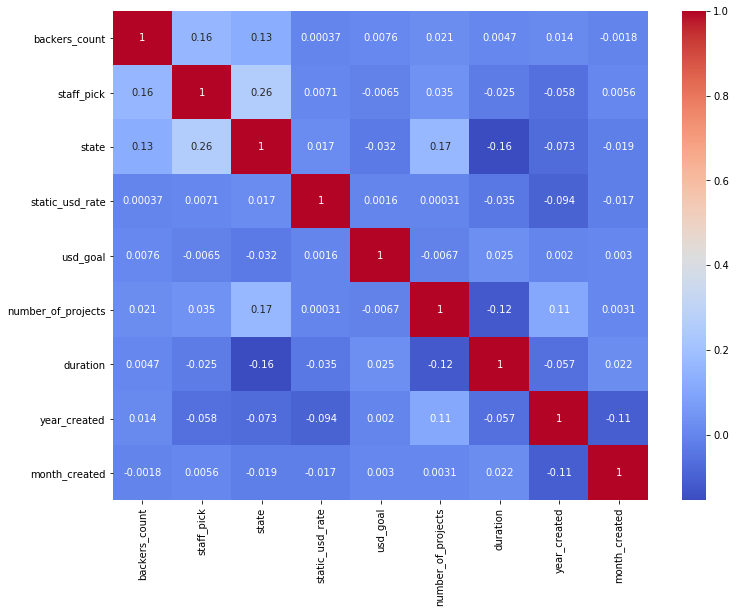

In [34]:
# Plotting the heatmap
plt.figure(figsize = (12,9))
sns.heatmap(X_heat.corr(), annot=True, cmap = 'coolwarm')

No obvious correlation between features, so we are fine.

## 6. Machine Learning

The main focus for prediction here is Precision.<br>
As a high Precision shows a low rate of false positives, we can give our customers the best guess on if their project will truly be successful or not.

In [35]:
#std scaler for our ml dataframe
std_scale = preprocessing.StandardScaler().fit(X)
df_train_test = std_scale.transform(X)
df_scale = pd.DataFrame(df_train_test)
df_scale.columns = X.columns
df_scale.head()

,is_starrable,staff_pick,static_usd_rate,usd_goal,number_of_projects,duration,year_created,month_created,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AU,country_BE,country_CA,...,sub_category_sound,sub_category_space exploration,sub_category_spaces,sub_category_stationery,sub_category_tabletop games,sub_category_taxidermy,sub_category_television,sub_category_textiles,sub_category_thrillers,sub_category_translations,sub_category_typography,sub_category_vegan,sub_category_video,sub_category_video art,sub_category_video games,sub_category_wearables,sub_category_weaving,sub_category_web,sub_category_webcomics,sub_category_webseries,sub_category_woodworking,sub_category_workshops,sub_category_world music,sub_category_young adult,sub_category_zines
0,0.0,-0.383143,-0.064511,-0.036111,1.337360,-0.207369,0.850899,0.498490,-0.197861,-0.182626,-0.134734,-0.189948,-0.235502,-0.405774,-0.292466,3.837548,-0.14893,-0.412387,-0.186777,-0.334469,-0.343066,-0.168996,-0.152508,-0.0506,-0.217829,...,-0.064907,-0.043654,-0.071818,-0.037973,-0.110862,-0.007698,-0.077012,-0.043175,-0.067525,-0.030997,-0.027334,-0.06398,-0.04941,-0.034359,-0.116739,-0.083121,-0.023857,-0.147615,-0.068448,-0.119371,-0.085121,-0.031283,-0.111953,-0.070132,-0.052051
1,0.0,-0.383143,-0.064511,-0.023517,-0.263149,-0.207369,-1.706585,0.795654,-0.197861,-0.182626,-0.134734,-0.189948,-0.235502,-0.405774,-0.292466,-0.260583,-0.14893,2.424909,-0.186777,-0.334469,-0.343066,-0.168996,-0.152508,-0.0506,-0.217829,...,-0.064907,-0.043654,-0.071818,-0.037973,-0.110862,-0.007698,-0.077012,-0.043175,-0.067525,-0.030997,-0.027334,-0.06398,-0.04941,-0.034359,-0.116739,-0.083121,-0.023857,-0.147615,-0.068448,-0.119371,-0.085121,-0.031283,-0.111953,-0.070132,-0.052051
2,0.0,-0.383143,0.895102,-0.026071,0.003602,2.269387,0.850899,-1.581653,-0.197861,-0.182626,-0.134734,-0.189948,-0.235502,-0.405774,-0.292466,3.837548,-0.14893,-0.412387,-0.186777,-0.334469,-0.343066,-0.168996,-0.152508,-0.0506,-0.217829,...,-0.064907,-0.043654,-0.071818,-0.037973,-0.110862,-0.007698,-0.077012,-0.043175,-0.067525,-0.030997,-0.027334,-0.06398,-0.04941,-0.034359,-0.116739,-0.083121,-0.023857,-0.147615,-0.068448,-0.119371,-0.085121,-0.031283,-0.111953,-0.070132,-0.052051
3,0.0,-0.383143,-0.064511,-0.034492,-0.263149,-0.207369,-1.706585,1.687144,-0.197861,-0.182626,-0.134734,-0.189948,-0.235502,-0.405774,-0.292466,-0.260583,-0.14893,-0.412387,-0.186777,2.989814,-0.343066,-0.168996,-0.152508,-0.0506,-0.217829,...,-0.064907,-0.043654,-0.071818,-0.037973,-0.110862,-0.007698,-0.077012,-0.043175,-0.067525,-0.030997,-0.027334,-0.06398,-0.04941,-0.034359,-0.116739,-0.083121,-0.023857,-0.147615,-0.068448,-0.119371,-0.085121,-0.031283,-0.111953,-0.070132,-0.052051
4,0.0,-0.383143,-0.064511,-0.033862,-0.263149,-0.207369,-0.683591,1.092817,-0.197861,-0.182626,-0.134734,-0.189948,-0.235502,-0.405774,-0.292466,-0.260583,-0.14893,2.424909,-0.186777,-0.334469,-0.343066,-0.168996,-0.152508,-0.0506,-0.217829,...,-0.064907,-0.043654,-0.071818,-0.037973,-0.110862,-0.007698,-0.077012,-0.043175,-0.067525,-0.030997,-0.027334,-0.06398,-0.04941,-0.034359,-0.116739,-0.083121,-0.023857,-0.147615,-0.068448,-0.119371,-0.085121,-0.031283,-0.111953,-0.070132,-0.052051


In [36]:
#scaler for sample
std_scale = preprocessing.StandardScaler().fit(X_sample)
df_train_test_sample = std_scale.transform(X_sample)
df_scale_sample = pd.DataFrame(df_train_test_sample)
df_scale_sample.columns = X_sample.columns
df_scale_sample.head()

,is_starrable,staff_pick,static_usd_rate,usd_goal,number_of_projects,duration,year_created,month_created,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AU,country_BE,country_CA,...,sub_category_sound,sub_category_space exploration,sub_category_spaces,sub_category_stationery,sub_category_tabletop games,sub_category_taxidermy,sub_category_television,sub_category_textiles,sub_category_thrillers,sub_category_translations,sub_category_typography,sub_category_vegan,sub_category_video,sub_category_video art,sub_category_video games,sub_category_wearables,sub_category_weaving,sub_category_web,sub_category_webcomics,sub_category_webseries,sub_category_woodworking,sub_category_workshops,sub_category_world music,sub_category_young adult,sub_category_zines
0,0.0,-0.381842,-0.059804,-0.013147,-0.260156,-0.372331,1.366342,-0.387001,-0.198885,-0.181083,-0.13462,-0.191008,-0.233849,-0.407152,-0.299269,-0.261488,-0.154962,-0.40782,-0.182258,-0.333611,-0.342973,-0.163705,-0.150852,-0.055311,-0.215044,...,-0.058838,-0.044766,-0.071949,-0.038759,-0.104244,-0.007071,-0.08182,-0.044766,-0.071597,-0.033931,-0.030837,-0.063372,-0.047488,-0.036767,-0.120447,-0.086343,-0.024502,-0.152919,-0.06835,-0.118943,-0.08396,-0.032421,-0.107623,-0.076048,-0.055311
1,0.0,-0.381842,-0.059804,0.012988,0.022745,1.509682,0.850449,0.204902,-0.198885,-0.181083,-0.13462,-0.191008,-0.233849,-0.407152,-0.299269,-0.261488,6.453210,-0.40782,-0.182258,-0.333611,-0.342973,-0.163705,-0.150852,-0.055311,-0.215044,...,-0.058838,-0.044766,-0.071949,-0.038759,-0.104244,-0.007071,-0.08182,-0.044766,-0.071597,-0.033931,-0.030837,-0.063372,-0.047488,-0.036767,-0.120447,-0.086343,-0.024502,6.539394,-0.06835,-0.118943,-0.08396,-0.032421,-0.107623,-0.076048,-0.055311
2,0.0,2.618883,2.034485,-0.026979,0.022745,0.397584,0.334556,-0.387001,-0.198885,-0.181083,-0.13462,-0.191008,-0.233849,-0.407152,-0.299269,-0.261488,-0.154962,-0.40782,-0.182258,2.997503,-0.342973,-0.163705,-0.150852,-0.055311,-0.215044,...,-0.058838,-0.044766,-0.071949,-0.038759,-0.104244,-0.007071,-0.08182,-0.044766,-0.071597,-0.033931,-0.030837,-0.063372,-0.047488,-0.036767,-0.120447,-0.086343,-0.024502,-0.152919,-0.06835,-0.118943,-0.08396,-0.032421,-0.107623,-0.076048,-0.055311
3,0.0,2.618883,-0.059804,-0.037190,-0.260156,-0.201239,-1.729014,-0.091049,-0.198885,-0.181083,-0.13462,-0.191008,-0.233849,2.456084,-0.299269,-0.261488,-0.154962,-0.40782,-0.182258,-0.333611,-0.342973,-0.163705,-0.150852,-0.055311,-0.215044,...,-0.058838,-0.044766,-0.071949,-0.038759,-0.104244,-0.007071,-0.08182,-0.044766,-0.071597,-0.033931,-0.030837,-0.063372,-0.047488,-0.036767,-0.120447,-0.086343,-0.024502,-0.152919,-0.06835,-0.118943,-0.08396,-0.032421,-0.107623,-0.076048,-0.055311
4,0.0,-0.381842,0.544377,-0.035897,-0.260156,-2.168798,-0.181336,0.796804,-0.198885,-0.181083,-0.13462,-0.191008,-0.233849,-0.407152,-0.299269,-0.261488,-0.154962,-0.40782,-0.182258,-0.333611,-0.342973,-0.163705,-0.150852,-0.055311,-0.215044,...,-0.058838,-0.044766,-0.071949,-0.038759,-0.104244,-0.007071,-0.08182,-0.044766,-0.071597,-0.033931,-0.030837,-0.063372,-0.047488,-0.036767,-0.120447,-0.086343,-0.024502,-0.152919,-0.06835,-0.118943,-0.08396,-0.032421,-0.107623,-0.076048,-0.055311


In [37]:
#test split normal
X_train, X_test, y_train, y_test = train_test_split(df_scale, y, test_size=0.2, random_state=42)

In [39]:
#test split sample
X_train, X_test, y_train, y_test = train_test_split(df_scale_sample, y_sample, test_size=0.2, random_state=42)

### PCA

In [40]:
#PCA 
pca = PCA()
pca.fit_transform(df_scale)
explained_var = np.cumsum(pca.explained_variance_ratio_)

In [41]:
print(np.where(explained_var > 0.8)[0][0])
print(np.where(explained_var > 0.9)[0][0])
print(np.where(explained_var > 0.99)[0][0])

131
149
167


### Naive Bayes

In [42]:
# Naive Bayes to get some start predictions
from sklearn.naive_bayes import GaussianNB

modelG = GaussianNB()
modelG.fit(X_train, y_train)

print(classification_report(y_test, modelG.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.98      0.72      1819
           1       0.96      0.36      0.53      2181

    accuracy                           0.65      4000
   macro avg       0.76      0.67      0.62      4000
weighted avg       0.78      0.65      0.61      4000



### Random Forest:

In [44]:
# Create the model with 100 trees
RSEED = 42
model = RandomForestClassifier(n_estimators=50,
                               random_state=RSEED,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

# Stats about the trees in random forest
n_nodes = []
max_depths = []
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Average number of nodes 7407
Average maximum depth 89


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


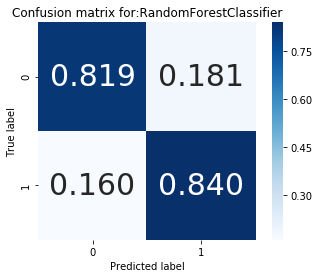

In [45]:
# Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30},
cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:{}'.format(model.__class__.__name__));


In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


In [47]:
print(cm)

[[1490  329]
 [ 350 1831]]


In [48]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1819
           1       0.85      0.84      0.84      2181

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [49]:
# Random forest with simple cross validation
model = RandomForestClassifier(n_estimators=50,
                               random_state=RSEED,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
print(np.mean(cross_val_score(model, X_train, y_train, cv=3)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.828375018189293


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


### Rnd forest with PCA and RandomizedSearchCV

In [50]:
# PCA and the nr of variables printed which explain variance of 0.8, 0.9, 0.99
pca = PCA()
pca.fit_transform(df_scale)
explained_var = np.cumsum(pca.explained_variance_ratio_)
print(np.where(explained_var > 0.8)[0][0])
print(np.where(explained_var > 0.9)[0][0])
print(np.where(explained_var > 0.99)[0][0])

131
149
167


In [ ]:
# Care : takes loooooong

from sklearn.model_selection import RandomizedSearchCV
pipe_rndforest = Pipeline([("pca", PCA(n_components=149)),("clf", RandomForestClassifier())])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1800, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'clf__n_estimators': n_estimators,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
               'clf__bootstrap': bootstrap}

#rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=pipe_rndforest,
                               param_distributions=random_grid, 
                               n_iter=15,random_state=42, cv = 3,
                               n_jobs=-1)


#X_new = np.array(X_train)
#y_new = np.array(y_train)
# Fit on training data
rf_random.fit(X_train, y_train)

                                    

#### Running above gives the following results :
````
RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=149, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
          ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid='warn', n_iter=15, n_jobs=-1,
          param_distributions={'clf__n_estimators': [500, 526, 553, 579, 606, 632, 659, 685, 712, 738, 765, 791, 818, 844, 871, 897, 924, 951, 977, 1004, 1030, 1057, 1083, 1110, 1136, 1163, 1189, 1216, 1242, 1269, 1295, 1322, 1348, 1375, 1402, 1428, 1455, 1481, 1508, 1534, 1561, 1587, 1614, 1640, 1667, 1693, ...min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4], 'clf__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
````

In [ ]:
# pred
rf_random_best_score = rf_random.best_score_
rf_random_best_params = rf_random.best_params_
print(rf_random_best_score)
print(rf_random_best_params)

#### results :
````
0.8137855434001674
{'clf__n_estimators': 1561, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__max_depth': 60, 'clf__bootstrap': True}
````

In [ ]:
# classification report
rf_random_y_pred = rf_random.predict(X_test)
print(classification_report(y_test, rf_random_y_pred))

#### results: 
````
              precision    recall  f1-score   support
           0       0.76      0.84      0.80     14838
           1       0.86      0.80      0.83     18915
   micro avg       0.81      0.81      0.81     33753
   macro avg       0.81      0.82      0.81     33753
weighted avg       0.82      0.81      0.82     33753
````

In [ ]:
pipe_best_rndforest = Pipeline([("pca", PCA(n_components=149)),
                                ("clf", RandomForestClassifier(n_estimators= 1800, min_samples_split= 10, min_samples_leaf= 4, max_features= 'auto', max_depth= 90, bootstrap= True))])

#rf = RandomForestClassifier()

pipe_best_rndforest.fit(X_train,y_train)

print(classification_report(y_test, pipe_best_rndforest.predict(X_test)))

### XGboost

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 80.65%


xgboost delivers 81% Accuracy

# Repeated and Stratified Kfold models

In [54]:
#repeated kfold
from sklearn.model_selection import RepeatedKFold

model = RandomForestClassifier(n_estimators=100,
                               random_state=563,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
prec_list = []
rec_list = []
score_list = []
acc_list = []
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)

#classifing each step in the folds and appending a list of scores
for train_index, test_index in rkf.split(X):
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    report = classification_report(y_test, model.predict(X_test), output_dict=True )
    prec_list.append(report['macro avg']['precision'])
    rec_list.append(report['macro avg']['recall'])   
    score_list.append(report['macro avg']['f1-score'])
    acc_list.append(report['accuracy'])

Train: [     0      2      3 ... 168759 168760 168762] Validation: [     1      4      6 ... 168757 168761 168763]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


Train: [     1      4      6 ... 168757 168761 168763] Validation: [     0      2      3 ... 168759 168760 168762]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


Train: [     0      1      4 ... 168758 168761 168763] Validation: [     2      3      5 ... 168759 168760 168762]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


Train: [     2      3      5 ... 168759 168760 168762] Validation: [     0      1      4 ... 168758 168761 168763]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [55]:
from statistics import mean
print("The mean precision of the kfold is:   {}".format(mean(prec_list)))
print("The mean recall of the kfold is:      {}".format(mean(rec_list)))
print("The mean f1score of the kfold is:     {}".format(mean(score_list)))
print("The mean accuracy of the kfold is:    {}".format(mean(acc_list)))

The mean precision of the kfold is:   0.8409524962799142
The mean recall of the kfold is:      0.8422629268804545
The mean f1score of the kfold is:     0.8415428509467813
The mean accuracy of the kfold is:    0.8435626081391766


In [56]:
#stratified Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score

model = RandomForestClassifier(n_estimators=50,
                               random_state=563,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

skf = StratifiedKFold(n_splits=5, random_state=None)

prec_list = []
rec_list = []
score_list = []
acc_list = []

#classifing each step in the folds and appending a list of scores
for train_index, test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    report = classification_report(y_test, model.predict(X_test), output_dict=True )
    prec_list.append(report['macro avg']['precision'])
    rec_list.append(report['macro avg']['recall'])   
    score_list.append(report['macro avg']['f1-score'])
    acc_list.append(report['accuracy'])

Train: [ 31572  31573  31574 ... 168761 168762 168763] Validation: [    0     1     2 ... 37052 37056 37058]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished


Train: [     0      1      2 ... 168761 168762 168763] Validation: [31572 31573 31574 ... 72745 72746 72747]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished


Train: [     0      1      2 ... 168761 168762 168763] Validation: [ 63320  63321  63323 ... 105624 105625 105631]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


Train: [     0      1      2 ... 168761 168762 168763] Validation: [ 98030  98034  98037 ... 138004 138010 138014]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished


Train: [     0      1      2 ... 138004 138010 138014] Validation: [131997 131999 132000 ... 168761 168762 168763]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


In [57]:
from statistics import mean
print("The mean precision of the kfold is:   {}".format(mean(prec_list)))
print("The mean recall of the kfold is:      {}".format(mean(rec_list)))
print("The mean f1score of the kfold is:     {}".format(mean(score_list)))
print("The mean accuracy of the kfold is:    {}".format(mean(acc_list)))

The mean precision of the kfold is:   0.8413241320805076
The mean recall of the kfold is:      0.8427702018687002
The mean f1score of the kfold is:     0.8418267012647205
The mean accuracy of the kfold is:    0.843752144911305


### XGboost with PCA and GridSearch

In [59]:
# XGboost with pca and GridSearch
# Care : takes loooooong
#run this
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
pipe_XGB = Pipeline([("pca", PCA(n_components=149)),("clf", XGBClassifier())])



# Create the random grid
grid = {'clf__n_estimators': [100,200],
        'clf__subsample': [0.7,0.9],
        'clf__min_child_weight': [100,200]
        }

#classifier
rf_XGB = GridSearchCV(estimator=pipe_XGB,
                               param_grid=grid, 
                               cv = 3,
                               n_jobs=-1)



rf_XGB.fit(X_train, y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=149, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                   

In [60]:
rf_XGB_best_score = rf_XGB.best_score_
rf_XGB_best_params = rf_XGB.best_params_
print(rf_XGB_best_score)
print(rf_XGB_best_params)

0.8420955174354872
{'clf__min_child_weight': 100, 'clf__n_estimators': 200, 'clf__subsample': 0.9}


In [61]:
rf_XGB_y_pred = rf_XGB.predict(X_test)
print(classification_report(y_test, rf_XGB_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     14830
           1       0.87      0.81      0.84     18922

    accuracy                           0.83     33752
   macro avg       0.83      0.83      0.83     33752
weighted avg       0.83      0.83      0.83     33752



Better precision for success but worse for failed

## 7. Summary

**Most important findings:**
* Small and short projects tend to do better
* Creative categories
* Technical categories don’t do well ( Avoid )
* Get the quality up so staff spotlights you
* 84% Prediction in average
* 87% for successful project

## 8. Future Work

* Get more data
* Further data analysis:
* Name and description of projects
* Timeframes
* Analyse market trends
* Run Models with unskewed data to see if there is a difference
* Check out how much money Kickstarter is making with these projects